# DATA SCIENCE INTERN @BHARAT INTERN

## Task1: Stock Prediction of Amazon.

### Name : Alfiya Iraqui

## Importing dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AMZN.csv')
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [3]:
X = []
y = []
for i in range(60, len(data)):
    X.append(data[i-60:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [4]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 3s 33ms/step - loss: 0.1436
Epoch 2/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0380
Epoch 3/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0163
Epoch 4/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0189
Epoch 5/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0113
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0117
Epoch 7/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0092
Epoch 8/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0086
Epoch 9/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0073
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0070
Epoch 11/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0069
Epoch 12/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0065
Epoch 13/100
6/6 [==============================]

In [5]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 1s 12ms/step


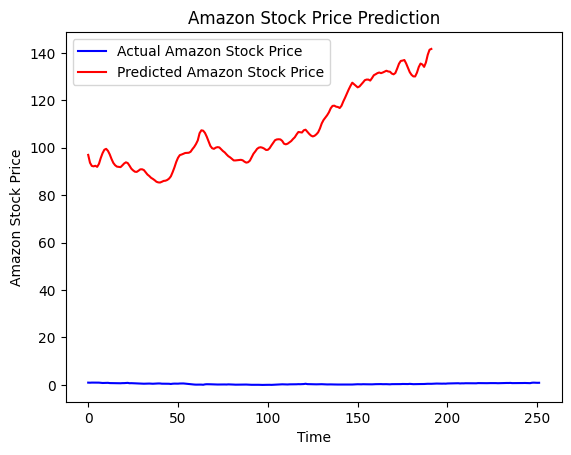

In [6]:
plt.plot(data, color='blue', label='Actual Amazon Stock Price')
plt.plot(predictions, color='red', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [8]:
future_predictions = []
for i in range(30):
    prediction = model.predict(future_X)
    future_predictions.append(prediction[0, 0])
    prediction = np.reshape(prediction, (1, 1, 1))
    future_X = np.append(future_X[:, 1:, :], prediction, axis=1)


future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 25ms/step


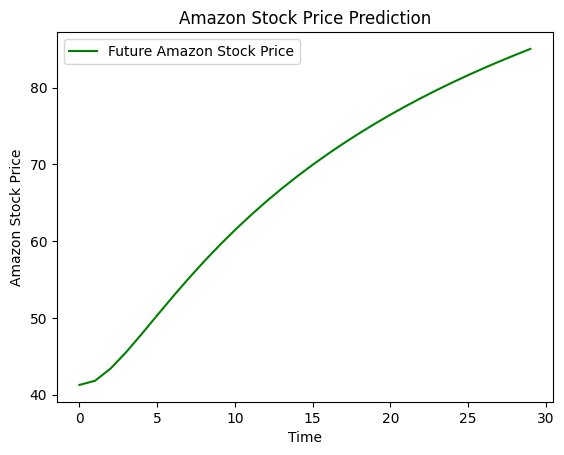

In [9]:
plt.plot(future_predictions, color='green', label='Future Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()